In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [2]:
device = torch.device("cuda")

In [3]:
mnist_train = torchvision.datasets.FashionMNIST(root='~/test/Datasets/FashionMNIST',train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='~/test/Datasets/FashionMNIST',train=False, download=True, transform=transforms.ToTensor())

In [4]:
batch_size = 256
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,shuffle=True, num_workers=2)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size,shuffle=False, num_workers=2)

In [5]:
class SoftmaxNet(nn.Module):
    def __init__(self):
        super(SoftmaxNet,self).__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(784,10)
    def forward(self,x):
        y = self.flatten(x)
        y = self.linear(y)
        return y

In [6]:
net = SoftmaxNet()
net.to(device)

SoftmaxNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [7]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights)

SoftmaxNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [8]:
loss = nn.CrossEntropyLoss()

In [9]:
optimizer = optim.SGD(net.parameters(),lr=0.03)

In [10]:
loss_list = []
epoch_list = []
num_epochs = 40
for epoch in range(1,num_epochs+1):
    for X,y in train_iter:
        X = X.to(device)
        y = y.to(device)
        l=loss(net(X),y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    epoch_list.append(epoch)
    loss_list.append(l.item())
    print('epoch %d, loss: %f' % (epoch, l.item()))      

epoch 1, loss: 0.735674
epoch 2, loss: 0.741675
epoch 3, loss: 0.702587
epoch 4, loss: 0.663624
epoch 5, loss: 0.716488
epoch 6, loss: 0.519208
epoch 7, loss: 0.365440
epoch 8, loss: 0.611615
epoch 9, loss: 0.420317
epoch 10, loss: 0.545833
epoch 11, loss: 0.508353
epoch 12, loss: 0.521455
epoch 13, loss: 0.512901
epoch 14, loss: 0.599286
epoch 15, loss: 0.481422
epoch 16, loss: 0.450080
epoch 17, loss: 0.545920
epoch 18, loss: 0.597974
epoch 19, loss: 0.484878
epoch 20, loss: 0.520654
epoch 21, loss: 0.511643
epoch 22, loss: 0.376109
epoch 23, loss: 0.423481
epoch 24, loss: 0.390210
epoch 25, loss: 0.377652
epoch 26, loss: 0.285284
epoch 27, loss: 0.343254
epoch 28, loss: 0.437730
epoch 29, loss: 0.444005
epoch 30, loss: 0.403632
epoch 31, loss: 0.299590
epoch 32, loss: 0.407022
epoch 33, loss: 0.464733
epoch 34, loss: 0.374470
epoch 35, loss: 0.420835
epoch 36, loss: 0.349602
epoch 37, loss: 0.564385
epoch 38, loss: 0.334537
epoch 39, loss: 0.428273
epoch 40, loss: 0.483501
epoch 41,

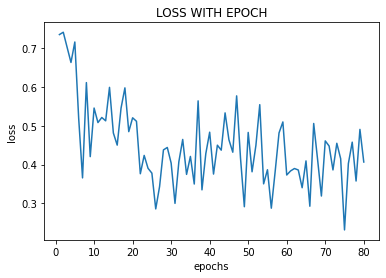

In [11]:
import matplotlib.pyplot as plt
plt.plot(epoch_list,loss_list)
plt.title("LOSS WITH EPOCH")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [12]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        X = X.to(device)
        y = y.to(device)
        acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n

In [13]:
#训练集精度
evaluate_accuracy(train_iter,net)

0.86085

In [14]:
#测试集精度
evaluate_accuracy(test_iter,net)

0.8413